# Yamsafer Project

Importing Yamsafer Data set and store it , Storing cancel column in Y lable  

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataSet = pd.read_csv('train_data_mod.csv')
Y=dataSet["cancelled: Descending"]
dataSet.head()


,hotel.id: Descending,includes_weekend: Descending,is_cardless: Descending,is_prepaid: Descending,checkin_date: Descending,nights: Descending,number_of_rooms: Descending,hotel.stars: Descending,hotel.type.keyword: Descending,customer.country_code.keyword: Descending,hotel.country_en.keyword: Descending,hotel.city_en.keyword: Descending,customer.platform.keyword: Descending,created_at per day,cancelled: Descending
0,822620,0,1,0,"July 9, 2017",1,1,0,Hotel,SA,Saudi Arabia,Jeddah,iPhoneApp,"July 3, 2017",1
1,27032,0,0,0,"December 4, 2017",1,1,4,Hotel,SA,Egypt,Cairo,iPhoneApp,"December 4, 2017",0
2,452806,1,0,0,"June 28, 2017",7,1,5,Hotel Resort,SA,Indonesia,Nusa Dua,Chrome,"June 19, 2017",0
3,621754,0,0,0,"February 26, 2017",3,1,3,Hotel,SA,United Arab Emirates,Dubai,iPhoneApp,"February 20, 2017",1
4,205042,0,0,1,"October 15, 2017",1,1,2,Hotel,AE,United Arab Emirates,Abu Dhabi,AndroidApp,"October 9, 2017",0


The percentage of Cancelation Vs not cancel 

In [2]:

canceled=dataSet.groupby('cancelled: Descending').size()
numOfCancel = sum((dataSet["cancelled: Descending"]).values ==1)
numOfNotCancel = sum((dataSet["cancelled: Descending"]).values ==0)
print "not cancelled = " ,numOfNotCancel,"---> ",str((canceled/dataSet.shape[0])[0]*100)[:6]+" %"
print "cancelled= ",numOfCancel,"---> ",str((canceled/dataSet.shape[0])[1]*100)[:6]+" %"


not cancelled =  866 --->  72.106 %
cancelled=  335 --->  27.893 %


# months cancellation

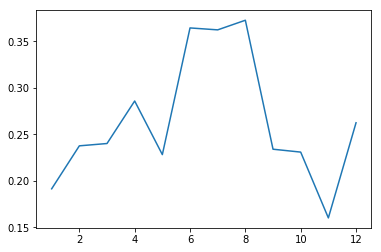

In [5]:
dataSet['checkin_date'] = pd.to_datetime(dataSet['checkin_date: Descending'])
dataSet['CHyear'], dataSet['CHmonth'] = dataSet['checkin_date'].dt.year, dataSet['checkin_date'].dt.month

df3 = dataSet.groupby(['CHmonth','cancelled: Descending']).size().reset_index().merge(dataSet.groupby('CHmonth').size().reset_index(), on = 'CHmonth')
df3['percent'] = df3['0_x'] / df3['0_y']
del df3['0_x']
del df3['0_y']
df3_cancelled = df3[df3['cancelled: Descending'] == 1]
df3_cancelled
plt.plot(df3_cancelled['CHmonth'], df3_cancelled['percent'])
# plt.ylim(ymin=0)

# hotel Calncellation

(0, 1.0447368421052632)

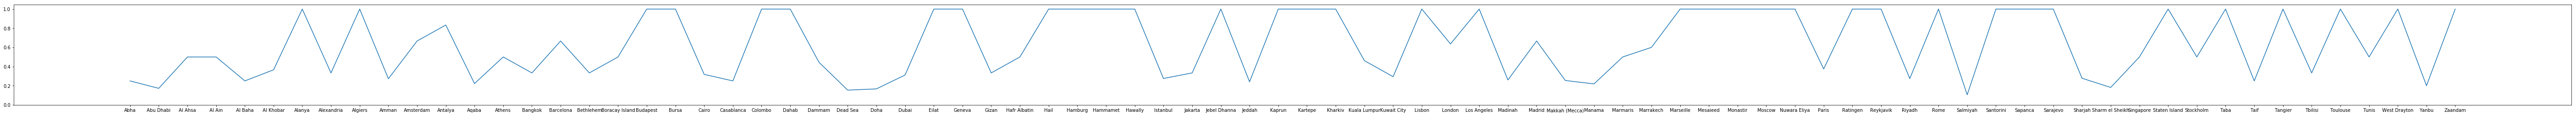

In [6]:
# dataSet['checkin_date'] = pd.to_datetime(dataSet['checkin_date: Descending'])
# dataSet['CHyear'], dataSet['CHmonth'] = dataSet['checkin_date'].dt.year, dataSet['checkin_date'].dt.month

df3 = dataSet.groupby(['hotel.city_en.keyword: Descending','cancelled: Descending']).size().reset_index().merge(dataSet.groupby('hotel.city_en.keyword: Descending').size().reset_index(), on = 'hotel.city_en.keyword: Descending')
df3['percent'] = df3['0_x'] / df3['0_y']
plt.figure(figsize=(100,4))
del df3['0_x']
del df3['0_y']
df3_cancelled = df3[df3['cancelled: Descending'] == 1]
df3_cancelled
plt.plot(df3_cancelled['hotel.city_en.keyword: Descending'], df3_cancelled['percent'])
plt.ylim(ymin=0)

In [7]:
# Separate Data Array Depends on Datatype for each 

booleanHeaders=['is_prepaid: Descending','is_cardless: Descending','includes_weekend: Descending']#3
numericHeaders=['hotel.stars: Descending','number_of_rooms: Descending','nights: Descending']#3
labelHeaders=['cancelled: Descending']#1
dateHeaders=['created_at per day','checkin_date: Descending']#2
categoricalHeaders=['hotel.id: Descending','hotel.type.keyword: Descending',
                    'customer.country_code.keyword: Descending','hotel.country_en.keyword: Descending',
                    'hotel.city_en.keyword: Descending','customer.platform.keyword: Descending']#6

In [8]:
#now we need data array and label array(cancelled or not)
#one hot encoding for strings
#date(1) : 3 columns of int(month,day,year) -> datetime
# categorize to season, diff between created and cancelled dates




In [9]:
from datetime import datetime
import time

dates=dataSet[dateHeaders]
created_at_per_day=  [time.mktime(datetime.strptime(d, "%B %d, %Y").timetuple()) for d in dataSet['created_at per day']]
checkin_date=  [time.mktime(datetime.strptime(d, "%B %d, %Y").timetuple()) for d in dataSet['checkin_date: Descending']]

created_at_per_daydf=pd.DataFrame(created_at_per_day)
checkin_datedf=pd.DataFrame(checkin_date)



In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def encode(data):
    values = array(data)
#     print(values)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
#     print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(data), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
#     print(onehot_encoded.size)
    return integer_encoded, label_encoder

def decode(data,index, label_encoder):
    values = array(data)
    return label_encoder.inverse_transform([argmax(data[index, :])])

encode1,lab=encode(dataSet['hotel.id: Descending'])
df1=pd.DataFrame(encode1)
# encoded+=(encode1)

encode2,lab=encode(dataSet['hotel.type.keyword: Descending'])
df2=pd.DataFrame(encode2)
# encoded+=(encode2)

encode3,lab=encode(dataSet['customer.country_code.keyword: Descending'])
df3=pd.DataFrame(encode3)
# encoded+=(encode3)

encode4,lab=encode(dataSet['hotel.country_en.keyword: Descending'])
df4=pd.DataFrame(encode4)
# encoded+=(encode4)

encode5,lab=encode(dataSet['hotel.city_en.keyword: Descending'])
df5=pd.DataFrame(encode5)
# encoded+=(encode5)

encode6,lab=encode(dataSet['customer.platform.keyword: Descending'])
df6=pd.DataFrame(encode6)

encArray=np.concatenate((encode1,encode2,
                          encode3,encode4,encode5,encode6),axis=1)

df1=np.concatenate((df1,df2,df3,df4,df5,df6),axis=1)
dataArray=np.concatenate((dataSet[numericHeaders],dataSet[booleanHeaders],
                          created_at_per_daydf,checkin_datedf,df1),axis=1)

labelsArray=dataSet[labelHeaders]
print dataArray.shape
print labelsArray.shape

(1201L, 14L)
(1201, 1)


In [11]:
# train_testSplit(featuresN,..shufle=True)

-Split Data

# split

In [12]:
from sklearn.model_selection import train_test_split

xTrain,xValid,yTrain,yValid=train_test_split(dataArray,labelsArray,test_size=0.45,shuffle=True)
print xTrain[0]
print xValid.shape
print yTrain.shape
print yValid.shape


[4.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 1.4881464e+09 1.4882328e+09 2.5600000e+02 5.0000000e+00
 2.8000000e+01 3.1000000e+01 9.5000000e+01 9.0000000e+00]
(541L, 14L)
(660, 1)
(541, 1)


# Normalization

In [13]:
# Answer here
mins=np.min(xTrain,axis=0)
maxs=np.max(xTrain,axis=0)
print('Mins', mins)
print('Maxs', maxs)
print('Before normalization')
print(xTrain[:2])
xTrain=(xTrain-mins)/(maxs-mins)
xValid=(xValid-mins)/(maxs-mins)
print('After normalization')
print(xTrain[:2])

('Mins', array([0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 1.4833080e+09, 1.4833944e+09,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00]))
('Maxs', array([5.0000000e+00, 2.1000000e+01, 2.1000000e+01, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.5141528e+09, 1.5314292e+09,
       8.1300000e+02, 1.3000000e+01, 3.4000000e+01, 4.3000000e+01,
       1.5600000e+02, 9.0000000e+00]))
Before normalization
[[4.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 1.4881464e+09 1.4882328e+09 2.5600000e+02 5.0000000e+00
  2.8000000e+01 3.1000000e+01 9.5000000e+01 9.0000000e+00]
 [3.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00
  1.0000000e+00 1.5093144e+09 1.5095736e+09 3.1600000e+02 5.0000000e+00
  2.8000000e+01 3.1000000e+01 9.2000000e+01 2.0000000e+00]]
After normalization
[[0.8        0.05       0.         0.         1.      

# graphs


# knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn

num_neighbors=range(1,xTrain.shape[0])
acc=[]
for i in num_neighbors:
    clf=knn(n_neighbors=i).fit(xTrain,yTrain)
    acc.append(clf.score(xValid,yValid)*100)
# print acc[0]
plt.plot(acc)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



C:\Users\tArIq\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [ ]:
# dataArray[0]


In [ ]:
import pylab as plt

# plt.plot(dataArray[:][:],labelsArray.loc[:][:],'o-',color='r',label='w')
# DF=pd.DataFrame(dataArray)
print labelsArray[:][:]
# plt.legend()
# plt.show()

# logisitic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs

model = LogisticRegression()
model.fit(dataArray, labelsArray)
# new instances where we do not know the answer
Xnew, _ = make_blobs(n_samples=5, centers=5, n_features=14, random_state=1)
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))
    print

# SSE and Silhouette  errors

In [ ]:
clustering_data=np.concatenate((xTrain,xValid),axis=0)[:,:2]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5).fit(clustering_data) # Learning the cluster centers
print('Cluster centers:')
print(kmeans.cluster_centers_)
print('\nData labels (first 30 samples):')
print(kmeans.labels_[:30])
print('\nSum of Squared Error (SSE) of this particular clustering:')
print(kmeans.inertia_)
print('\nSilhouette Score:')
print(silhouette_score(clustering_data,kmeans.labels_))

# cross validation

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=5).fit(xTrain, yTrain)
clf.score(xValid, yValid) 

# svm and confusing metrices

In [ ]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  

svclassifier = SVC(kernel='linear')  
svclassifier.fit(xValid, yValid) 
y_pred = svclassifier.predict(xValid)  
print(confusion_matrix(yValid,y_pred))  
print(classification_report(yValid,y_pred))  